# Imports

In [131]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

from itertools import product
import itertools
from collections import OrderedDict
import operator
import re
from math import sqrt
import pickle

# Data Preprocessing

In [3]:
original_df = pd.read_csv('fifa-18-demo-player-dataset/CompleteDataset.csv', error_bad_lines=False)

/Users/paulfournier/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
processed_df = original_df.copy()
#drop the colums that cannot be used
processed_df = processed_df.drop(['Photo', 'Flag', 'Club Logo', 'Special', 'ID'], 1)

In [5]:
#Convert the numerical values from string type to integer type. 
def strToInt(string):
    try:
        integer = float(string)
        return integer
    except ValueError:
        return np.nan
    
processed_df['Acceleration'] = processed_df['Acceleration'].apply(strToInt)
processed_df['Aggression'] = processed_df['Aggression'].apply(strToInt)
processed_df['Agility'] = processed_df['Agility'].apply(strToInt)
processed_df['Balance'] = processed_df['Balance'].apply(strToInt)
processed_df['Ball control'] = processed_df['Ball control'].apply(strToInt)
processed_df['Composure'] = processed_df['Composure'].apply(strToInt)
processed_df['Crossing'] = processed_df['Crossing'].apply(strToInt)
processed_df['Curve'] = processed_df['Curve'].apply(strToInt)
processed_df['Dribbling'] = processed_df['Dribbling'].apply(strToInt)
processed_df['Finishing'] = processed_df['Finishing'].apply(strToInt)
processed_df['Free kick accuracy'] = processed_df['Free kick accuracy'].apply(strToInt)
processed_df['GK diving'] = processed_df['GK diving'].apply(strToInt)
processed_df['GK handling'] = processed_df['GK handling'].apply(strToInt)
processed_df['GK kicking'] = processed_df['GK kicking'].apply(strToInt)
processed_df['GK positioning'] = processed_df['GK positioning'].apply(strToInt)
processed_df['GK reflexes'] = processed_df['GK reflexes'].apply(strToInt)
processed_df['Heading accuracy'] = processed_df['Heading accuracy'].apply(strToInt)
processed_df['Interceptions'] = processed_df['Interceptions'].apply(strToInt)
processed_df['Jumping'] = processed_df['Jumping'].apply(strToInt)
processed_df['Long passing'] = processed_df['Long passing'].apply(strToInt)
processed_df['Long shots'] = processed_df['Long shots'].apply(strToInt)
processed_df['Marking'] = processed_df['Marking'].apply(strToInt)
processed_df['Penalties'] = processed_df['Penalties'].apply(strToInt)
processed_df['Positioning'] = processed_df['Positioning'].apply(strToInt)
processed_df['Reactions'] = processed_df['Reactions'].apply(strToInt)
processed_df['Short passing'] = processed_df['Short passing'].apply(strToInt)
processed_df['Shot power'] = processed_df['Shot power'].apply(strToInt)
processed_df['Sliding tackle'] = processed_df['Sliding tackle'].apply(strToInt)
processed_df['Sprint speed'] = processed_df['Sprint speed'].apply(strToInt)
processed_df['Stamina'] = processed_df['Stamina'].apply(strToInt)
processed_df['Standing tackle'] = processed_df['Standing tackle'].apply(strToInt)
processed_df['Strength'] = processed_df['Strength'].apply(strToInt)
processed_df['Vision'] = processed_df['Vision'].apply(strToInt)
processed_df['Volleys'] = processed_df['Volleys'].apply(strToInt)
processed_df['CAM'] = processed_df['CAM'].apply(strToInt)
processed_df['CB'] = processed_df['CB'].apply(strToInt)
processed_df['CDM'] = processed_df['CDM'].apply(strToInt)
processed_df['CF'] = processed_df['CF'].apply(strToInt)
processed_df['CM'] = processed_df['CM'].apply(strToInt)
processed_df['LAM'] = processed_df['LAM'].apply(strToInt)
processed_df['LB'] = processed_df['LB'].apply(strToInt)
processed_df['LCM'] = processed_df['LCM'].apply(strToInt)
processed_df['LDM'] = processed_df['LDM'].apply(strToInt)
processed_df['LF'] = processed_df['LF'].apply(strToInt)
processed_df['LM'] = processed_df['LM'].apply(strToInt)
processed_df['LS'] = processed_df['LS'].apply(strToInt)
processed_df['LW'] = processed_df['LW'].apply(strToInt)
processed_df['LWB'] = processed_df['LWB'].apply(strToInt)
processed_df['RAM'] = processed_df['RAM'].apply(strToInt)
processed_df['RB'] = processed_df['RB'].apply(strToInt)
processed_df['RCB'] = processed_df['RCB'].apply(strToInt)
processed_df['RCM'] = processed_df['RCM'].apply(strToInt)
processed_df['RDM'] = processed_df['RDM'].apply(strToInt)
processed_df['RF'] = processed_df['RF'].apply(strToInt)
processed_df['RM'] = processed_df['RM'].apply(strToInt)
processed_df['RS'] = processed_df['RS'].apply(strToInt)
processed_df['RW'] = processed_df['RW'].apply(strToInt)
processed_df['RWB'] = processed_df['RWB'].apply(strToInt)
processed_df['ST'] = processed_df['ST'].apply(strToInt)

In [6]:
#Convert wages and values to floats
def strToFloat(string):
    if string[-1] == 'M':
        value = float(string[1:-1])*1000000
    elif string[-1] == 'K':
        value = float(string[1:-1])*1000
    else:
        value = float(string[1:])
    return value
        
processed_df['Value'] = processed_df['Value'].apply(strToFloat)
processed_df['Wage'] = processed_df['Wage'].apply(strToFloat)

In [7]:
processed_df.head()

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,89.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,92.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,88.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

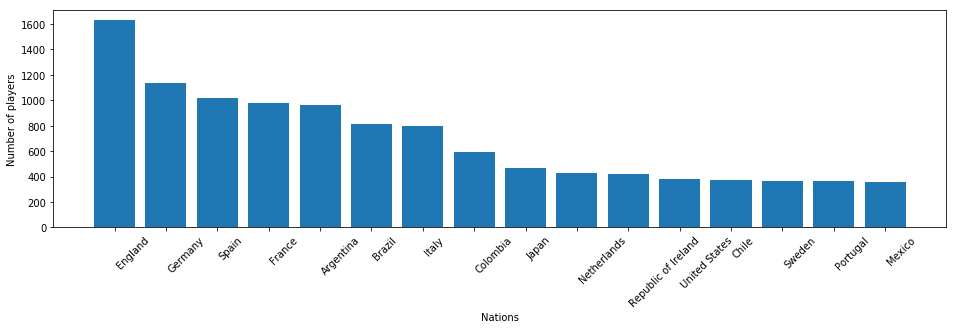

In [8]:
#Number of player per country
nations = {'Nation': 0}
def count_nations(nation):
    #Count the players per country
    if (nation in nations):
        nations[nation] = nations[nation] + 1
    else:
        nations[nation] = 1

processed_df['Nationality'].apply(count_nations)
nations.pop('Nation', None)
#Sort and take the top 10%
sorted_nations = OrderedDict(sorted(nations.items(), key=lambda x: x[1], reverse=True))
sorted_nations = dict((k, sorted_nations[k]) for k in list(sorted_nations.keys())[0:int(len(sorted_nations)/10)])

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_nations)), list(sorted_nations.values()))
plt.xticks(range(len(sorted_nations)), list(sorted_nations.keys()), rotation=45,  ha='left')
plt.xlabel('Nations')
plt.ylabel('Number of players')
plt.show()


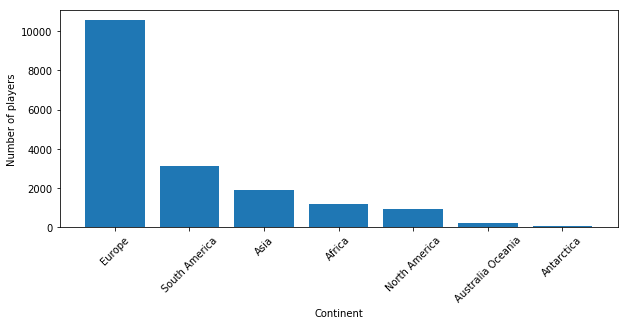

In [9]:
#Number of player per continent
continent_list = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}
continents = {'Africa' : 0, 'Antarctica' : 0,'Asia' : 0, 'Australia Oceania' : 0, 'Europe' : 0, 'North America' : 0, 'South America' : 0}

def count_continent(nation):
    #Count the players per continent
    for continent in continent_list:
        if nation in continent_list[continent]:
            continents[continent] = continents[continent] + 1
            return continent
    return np.NaN

processed_df['Nationality'].apply(count_continent)
sorted_continents = OrderedDict(sorted(continents.items(), key=lambda x: x[1], reverse=True))

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_continents)), list(sorted_continents.values()))
plt.xticks(range(len(sorted_continents)), list(sorted_continents.keys()), rotation = 45)
plt.xlabel('Continent')
plt.ylabel('Number of players')
plt.show()

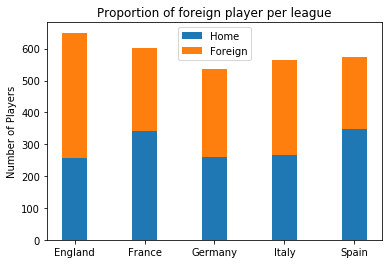

In [10]:
#Proportion of foreign player per league
club_list_per_league = {
    'England' : ['Manchester United', 'Chelsea', 'Manchester City', 'Arsenal', 'Tottenham Hotspur', 'Liverpool', 'Leicester City', 'Southampton', 'Everton', 'Swansea City', 'Stoke City', 'West Ham United', 'Watford', 'Bournemouth', 'Crystal Palace', 'West Bromwich Albion', 'Burnley', 'Newcastle United', 'Brighton & Hove Albion', 'Huddersfield Town'],
    'France' : ['Paris Saint-Germain', 'AS Monaco', 'AS Saint-Étienne', 'Olympique de Marseille', 'Olympique Lyonnais', 'OGC Nice', 'Girondins de Bordeaux', 'Stade Rennais FC', 'Montpellier Hérault SC', 'FC Nantes', 'En Avant de Guingamp', 'Amiens SC Football', 'Dijon FCO', 'Angers SCO', 'LOSC Lille', 'RC Strasbourg', 'SM Caen', 'Toulouse FC', 'ES Troyes AC', 'FC Metz'],
    'Germany' : ['FC Bayern Munich', 'Borussia Dortmund', 'Bayer 04 Leverkusen', 'FC Schalke 04', 'RB Leipzig', 'Borussia Mönchengladbach', 'TSG 1899 Hoffenheim', 'SV Werder Bremen', 'VfL Wolfsburg', 'Hertha BSC Berlin', 'Eintracht Frankfurt', 'VfB Stuttgart', 'Eintracht Braunschweig', 'FC Augsburg', '1. FSV Mainz 05', 'Hamburger SV', 'Hannover 96', 'SC Freiburg'],
    'Italy' : ['Juventus', 'Milan', 'Napoli', 'Inter', 'Roma', 'Torino', 'Lazio', 'Genoa', 'Sassuolo', 'Sampdoria', 'Fiorentina', 'Atalanta', 'Sampdoria', 'Bologna', 'Chievo Verona', 'Udinese', 'Cagliari', 'Ferrara (SPAL)', 'Crotone', 'Hellas Verona', 'Benevento Calcio'],
    'Spain' : ['Real Madrid CF', 'FC Barcelona', 'Atletico Madrid', 'Athletic Club de Bilbao','1. FC Köln', 'Villarreal CF', 'Real Sociedad', 'UD Las Palmas', 'RC Celta de Vigo', 'RCD Espanyol', 'SD Eibar', 'Valencia CF', 'Sevilla FC', 'RC Deportivo de La Coruña', 'Real Betis Balompié', 'Getafe CF', 'Girona CF', 'Deportivo Alav√©s', 'Levante UD', 'Deportivo Alavés', 'Málaga CF'],
}

two_columns = processed_df[['Nationality', 'Club']]

nationality_proportion = {'England' : [0, 0], 'France' : [0, 0], 'Germany' : [0, 0], 'Italy' : [0, 0], 'Spain' : [0, 0]}
def count_foreign_players():
    index = 0
    while (index < len(two_columns)):
        for country in club_list_per_league:
            if two_columns['Club'][index] in club_list_per_league[country]:
                if two_columns['Nationality'][index] == country:
                    nationality_proportion[country][0] = nationality_proportion[country][0] + 1
                else:
                    nationality_proportion[country][1] = nationality_proportion[country][1] + 1
        index += 1

count_foreign_players()
N = 5
home = (nationality_proportion['England'][0], nationality_proportion['France'][0], nationality_proportion['Germany'][0], nationality_proportion['Italy'][0], nationality_proportion['Spain'][0])
foreign = (nationality_proportion['England'][1], nationality_proportion['France'][1], nationality_proportion['Germany'][1], nationality_proportion['Italy'][1], nationality_proportion['Spain'][1])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
p1 = ax.bar(ind, home, width)
p2 = ax.bar(ind, foreign, width, bottom = home)
plt.ylabel('Number of Players')
plt.title('Proportion of foreign player per league')
plt.xticks(ind, ('England', 'France', 'Germany', 'Italy', 'Spain'))
plt.yticks(np.arange(0, 700, 100))
plt.legend((p1[0], p2[0]), ('Home', 'Foreign'))
plt.show()

In [11]:
#Average player value per country
# Selecting players with age smaller then 40 
dataset = processed_df.loc[processed_df['Age'] <= 40]
country_value = dataset.groupby("Nationality")["Value"].mean()
country_value = country_value.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_value['Nationality'],
        z = country_value['Value'],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Average<br>Player Value'),
      ) ]

layout = dict(
    title = 'Average Player Value Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map-value' )

In [12]:
#Average player wage per country
country_wage = dataset.groupby("Nationality")["Wage"].mean()
country_wage = country_wage.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_wage['Nationality'],
        z = country_wage['Wage'],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Average<br>Player Value'),
      ) ]

layout = dict(
    title = 'Average Player Wage Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map-value' )

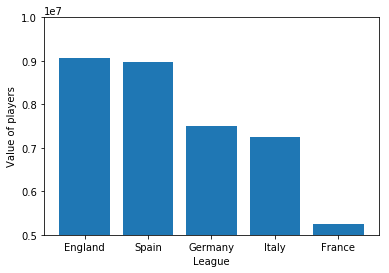

In [13]:
#Player value per league 
value_per_league = {'League': 0}
league_value = {'England' : 0, 'France' : 0, 'Germany' : 0, 'Italy' : 0, 'Spain' : 0}

def sum_values(series):
    value = series[1]

    #Count the players value per league
    for league in club_list_per_league:
        if series[0] in club_list_per_league[league]:
            league_value[league] += value
            return league
    return np.NaN

club_value = processed_df[['Club', 'Value']]
club_value.apply(sum_values, 1)
value_per_league.pop('League', None)

#Average the players value per league
for league in league_value:
    league_value[league] = league_value[league] / (float(nationality_proportion[league][0])+float(nationality_proportion[league][1]))

sorted_league_value = OrderedDict(sorted(league_value.items(), key=lambda x: x[1], reverse=True))

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_league_value)), list(sorted_league_value.values()))
plt.xticks(range(len(sorted_league_value)), list(sorted_league_value.keys()))
plt.xlabel('League')
plt.ylabel('Value of players')
ax.set(ylim=(0.5e7, 1e7))
plt.show()

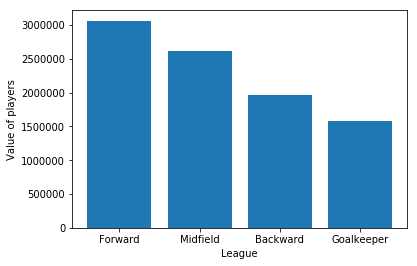

In [14]:
#Player value per position
position_list = {
    'Forward' : ['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'],
    'Midfield' : ['CAM', 'CDM', 'CM', 'LAM', 'LCM', 'LDM', 'LM', 'RAM', 'RCB', 'RCM', 'RDM', 'RM'],
    'Backward' : ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'],
    'Goalkeeper' : ['GK'],
}
sum_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}
player_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}
average_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}

def sum_values(series):
    already_counted = [0, 0, 0, 0] #Array to avoid having repeated values in the average
    preferred_position_list = re.sub("[^\w]", " ",  series[0]).split() #Split the preferred positions
    value = series[1]

    #Count the players per position category
    index = 0
    for preferred_position in preferred_position_list:
        for position in position_list:
            if preferred_position in position_list[position]:
                if(not already_counted[index]):
                    sum_per_position[position] += value
                    player_per_position[position] += 1                    
                    already_counted[index] = 1
                    
position_value = processed_df[['Preferred Positions', 'Value']]
position_value.apply(sum_values, 1)

#Average the players value per position category
for position in sum_per_position:
    average_per_position[position] = sum_per_position[position] / player_per_position[position]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(average_per_position)), list(average_per_position.values()))
plt.xticks(range(len(average_per_position)), list(average_per_position.keys()))
plt.xlabel('League')
plt.ylabel('Value of players')
plt.show()

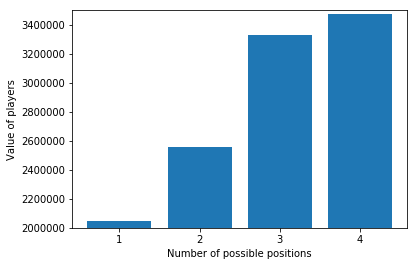

In [15]:
#Versatility and value
skill_versatility = {1: [0, 0], 2: [0, 0], 3: [0, 0], 4: [0, 0]}
average = {1: 0, 2: 0, 3: 0, 4: 0}

def sum_values(series):
    preferred_position_list = re.sub("[^\w]", " ",  series[0]).split() #Split the preferred positions
    skill_count = len(preferred_position_list)
    value = series[1]

    #Count the players per versatility
    if (skill_count in skill_versatility):
        skill_versatility[skill_count][0] += 1
        skill_versatility[skill_count][1] += value  
                    
position_value = processed_df[['Preferred Positions', 'Value']]
position_value.apply(sum_values, 1)

#Average the players value per position count
for count in skill_versatility:
    average[count] = skill_versatility[count][1] / skill_versatility[count][0]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(average)), list(average.values()))
plt.xticks(range(len(average)), list(average.keys()))
plt.xlabel('Number of possible positions')
plt.ylabel('Value of players')
ax.set(ylim=(2000000, 3500000))
plt.show()

<Figure size 432x288 with 0 Axes>

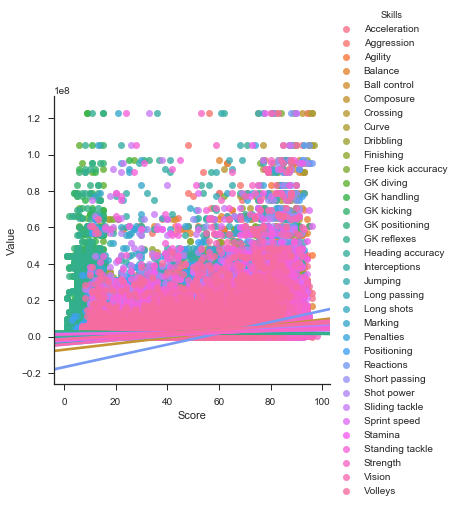

In [16]:
#Player value per skill
fig = plt.figure(figsize=(6,4))
sns.set(style="ticks")
test = pd.DataFrame(np.c_[processed_df['Value'], processed_df['Acceleration'], processed_df['Aggression'], processed_df['Agility'], processed_df['Balance'],
                          processed_df['Ball control'], processed_df['Composure'],processed_df["Crossing"],processed_df['Curve'], processed_df['Dribbling'],
                          processed_df['Finishing'], processed_df['Free kick accuracy'], processed_df['GK diving'], processed_df['GK handling'], processed_df['GK kicking'],
                          processed_df['GK positioning'], processed_df['GK reflexes'], processed_df['Heading accuracy'], processed_df['Interceptions'], processed_df['Jumping'],
                          processed_df['Long passing'], processed_df['Long shots'], processed_df['Marking'], processed_df['Penalties'], processed_df['Positioning'],
                          processed_df['Reactions'], processed_df['Short passing'], processed_df['Shot power'], processed_df['Sliding tackle'], processed_df['Sprint speed'], 
                          processed_df['Stamina'], processed_df['Standing tackle'], processed_df['Strength'], processed_df['Vision'], processed_df['Volleys'] ], 
                    columns=["Value", "Acceleration", "Aggression", "Agility", "Balance", "Ball control", "Composure", "Crossing", "Curve", "Dribbling", "Finishing", "Free kick accuracy", "GK diving",
                             "GK handling", "GK kicking", "GK positioning", "GK reflexes", "Heading accuracy", "Interceptions", "Jumping", "Long passing", "Long shots", "Marking", "Penalties", "Positioning",
                             "Reactions", "Short passing", "Shot power", "Sliding tackle", "Sprint speed", "Stamina", "Standing tackle", "Strength", "Vision","Volleys"])
test = test.melt('Value', var_name='Skills',  value_name='Score')
g = sns.lmplot(y="Value", x="Score", hue='Skills', data=test)
plt.show()

<Figure size 432x288 with 0 Axes>

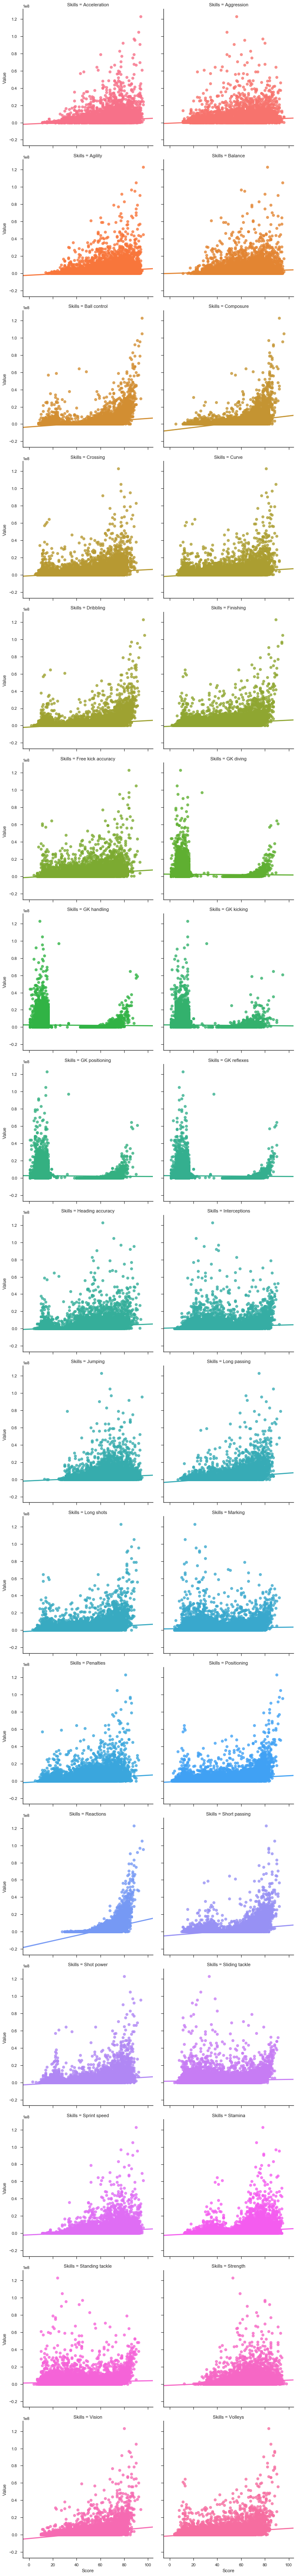

In [17]:
#Player value per skill
fig = plt.figure(figsize=(6,4))
sns.set(style="ticks")
test = pd.DataFrame(np.c_[processed_df['Value'], processed_df['Acceleration'], processed_df['Aggression'], processed_df['Agility'], processed_df['Balance'],
                          processed_df['Ball control'], processed_df['Composure'],processed_df["Crossing"],processed_df['Curve'], processed_df['Dribbling'],
                          processed_df['Finishing'], processed_df['Free kick accuracy'], processed_df['GK diving'], processed_df['GK handling'], processed_df['GK kicking'],
                          processed_df['GK positioning'], processed_df['GK reflexes'], processed_df['Heading accuracy'], processed_df['Interceptions'], processed_df['Jumping'],
                          processed_df['Long passing'], processed_df['Long shots'], processed_df['Marking'], processed_df['Penalties'], processed_df['Positioning'],
                          processed_df['Reactions'], processed_df['Short passing'], processed_df['Shot power'], processed_df['Sliding tackle'], processed_df['Sprint speed'], 
                          processed_df['Stamina'], processed_df['Standing tackle'], processed_df['Strength'], processed_df['Vision'], processed_df['Volleys'] ], 
                    columns=["Value", "Acceleration", "Aggression", "Agility", "Balance", "Ball control", "Composure", "Crossing", "Curve", "Dribbling", "Finishing", "Free kick accuracy", "GK diving",
                             "GK handling", "GK kicking", "GK positioning", "GK reflexes", "Heading accuracy", "Interceptions", "Jumping", "Long passing", "Long shots", "Marking", "Penalties", "Positioning",
                             "Reactions", "Short passing", "Shot power", "Sliding tackle", "Sprint speed", "Stamina", "Standing tackle", "Strength", "Vision","Volleys"])
test = test.melt('Value', var_name='Skills',  value_name='Score')
g = sns.lmplot(y="Value", x="Score", hue='Skills', col="Skills", data=test, col_wrap=2)
plt.show()

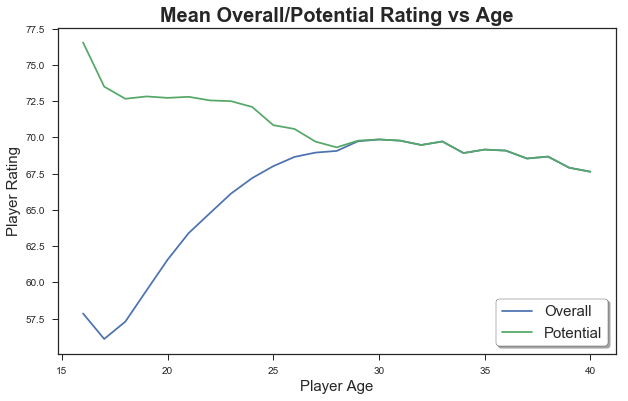

In [18]:
#Age and quality
#Age and potential
# Selecting players with age smaller then 40 
dataset = processed_df.loc[processed_df['Age'] <= 40]
# Selecting unique Age from DataFrame
age = dataset.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
overall = dataset.groupby("Age")["Overall"].mean().values
# Selecting mean Potential from DataFrame
potential = dataset.groupby("Age")["Potential"].mean().values

plt.figure(figsize=(10,6))
plt.title('Mean Overall/Potential Rating vs Age', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Rating', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, overall, label="Overall")
plt.plot(age, potential, label="Potential")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

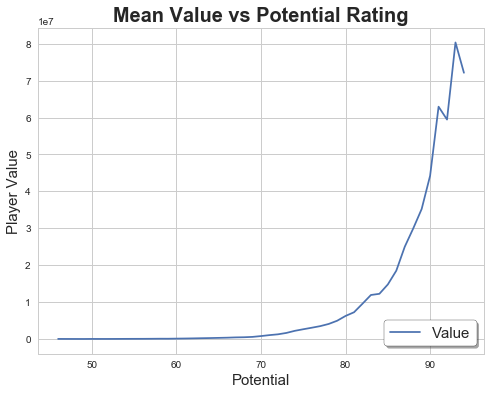

In [19]:
#Potential and Value
# Selecting unique Age from DataFrame
potential = dataset.sort_values("Potential")['Potential'].unique()
# Selecting mean Overall from DataFrame
overall = dataset.sort_values("Overall")['Overall'].unique()
# Selecting mean value from DataFrame
value = dataset.groupby("Potential")["Value"].mean().values

plt.figure(figsize=(8,6))
plt.title('Mean Value vs Potential Rating', fontsize=20, fontweight='bold')
plt.xlabel('Potential', fontsize=15)
plt.ylabel('Player Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(potential, value, label="Value")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()


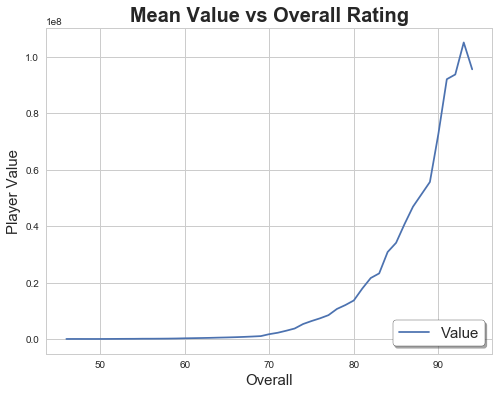

In [20]:
#Overall and Value
# Selecting unique Age from DataFrame
overall = dataset.sort_values("Overall")['Overall'].unique()
# Selecting mean Overall from DataFrame
value = dataset.groupby("Overall")["Value"].mean().values

plt.figure(figsize=(8,6))
plt.title('Mean Value vs Overall Rating', fontsize=20, fontweight='bold')
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Player Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(overall, value, label="Value")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

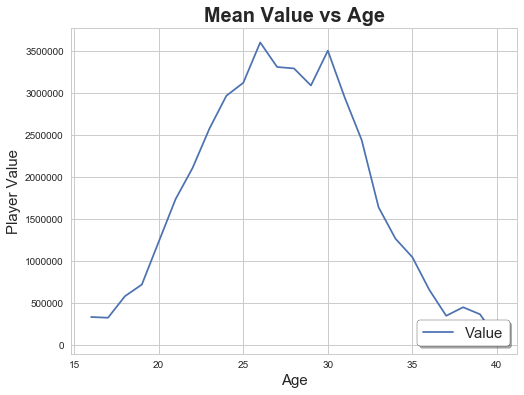

In [21]:
#Age and value
# Selecting unique Age from DataFrame
age = dataset.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
value = dataset.groupby("Age")["Value"].mean().values

plt.figure(figsize=(8,6))
plt.title('Mean Value vs Age', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Player Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, value, label="Value")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

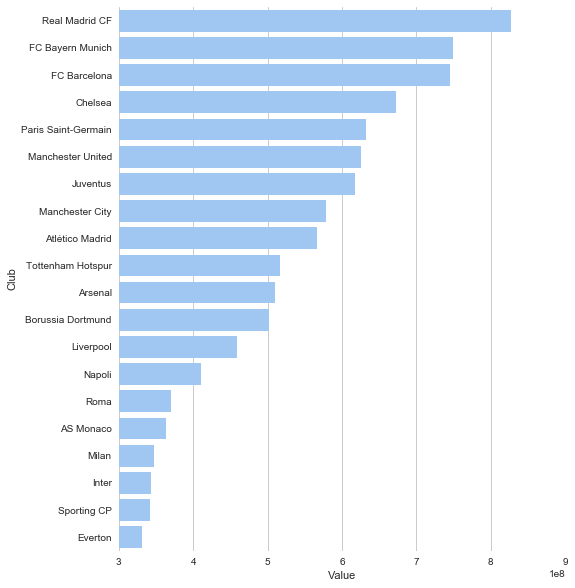

In [22]:
#Team value
club_value = dataset.groupby("Club")["Value"].sum()
club_value = club_value.reset_index()

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=club_value.nlargest(20, "Value")["Club"], x=club_value.nlargest(20, "Value")["Value"], data=club_value,
            label="Total", color="b")
ax.set(xlim=(3e8, 9e8))

sns.despine(left=True, bottom=True)

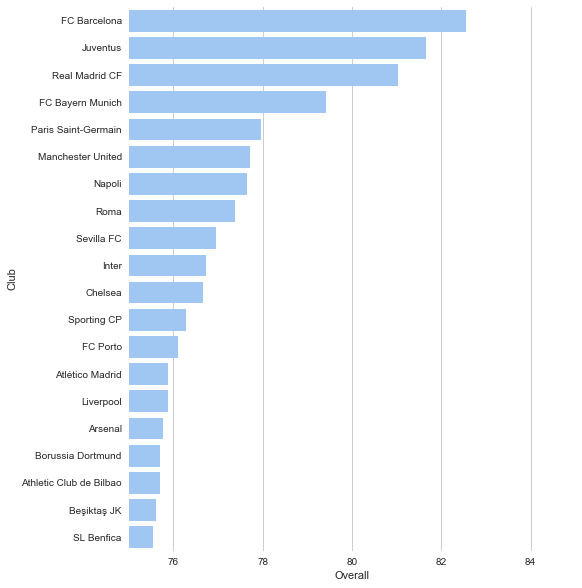

In [23]:
#Team quality
club_overall = dataset.groupby("Club")["Overall"].mean()
club_overall = club_overall.reset_index()

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=club_overall.nlargest(20, "Overall")["Club"], x=club_overall.nlargest(20, "Overall")["Overall"], data=club_overall,
            label="Total", color="b")
ax.set(xlim=(75, 85))
sns.despine(left=True, bottom=True)

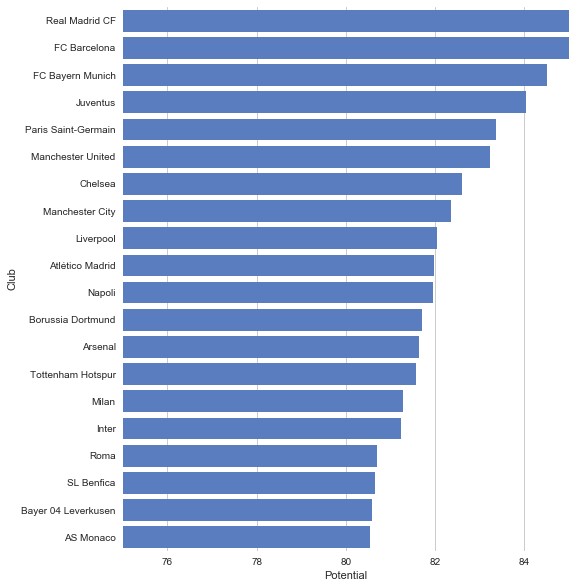

In [24]:
#Team potential
club_potential = dataset.groupby("Club")["Potential"].mean()
club_potential = club_potential.reset_index()

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(y=club_potential.nlargest(20, "Potential")["Club"], x=club_potential.nlargest(20, "Potential")["Potential"], data=club_potential,
            label="Total", color="b")
ax.set(xlim=(75, 85))
sns.despine(left=True, bottom=True)

In [25]:
#Average player overall score per country
country_overall = dataset.groupby("Nationality")["Overall"].mean()
country_overall = country_overall.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_overall['Nationality'],
        z = country_overall['Overall'],
        colorscale = [[55,"rgb(5, 10, 172)"],[59,"rgb(40, 60, 190)"],[63,"rgb(70, 100, 245)"],\
            [67,"rgb(90, 120, 245)"],[71,"rgb(106, 137, 247)"],[75,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Average<br>Overall Score'),
      ) ]

layout = dict(
    title = 'Player Quality',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Fournierp/0 or inside your plot.ly account where it is named 'd3-world-map'


In [26]:
#Average player potential score per country
country_potential = dataset.groupby("Nationality")["Potential"].mean()
country_potential = country_potential.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_potential['Nationality'],
        z = country_potential['Potential'],
        colorscale = [[65,"rgb(5, 10, 172)"],[67,"rgb(40, 60, 190)"],[69,"rgb(70, 100, 245)"],\
            [71,"rgb(90, 120, 245)"],[73,"rgb(106, 137, 247)"],[75,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Average<br>Potential Score'),
      ) ]

layout = dict(
    title = 'Player Potential',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map-potential' )

<Figure size 936x936 with 0 Axes>

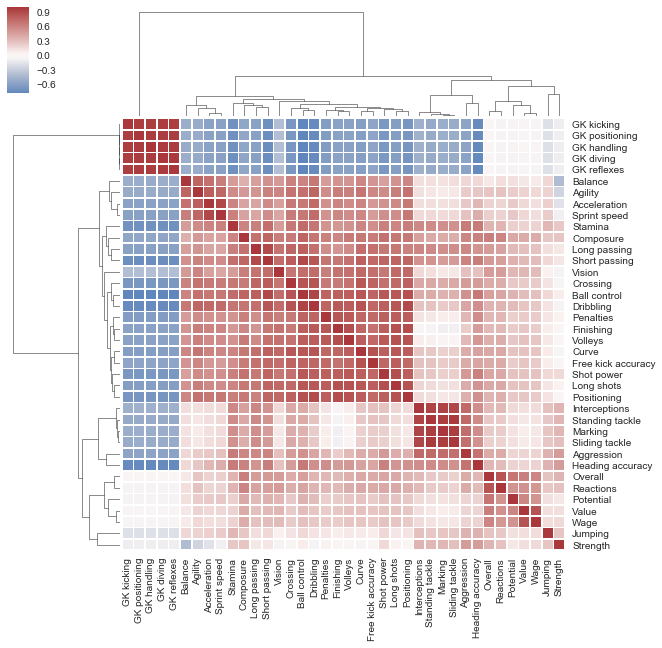

In [27]:
#Heatmap: show the correlation between similar features.
# Select a subset of the df
used_variables = ['Overall', 'Potential',
       'Value', 'Wage', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']
used_columns = (processed_df.columns.get_level_values(None).isin(used_variables))
df = processed_df.loc[:, used_columns]

# Draw the full plot
plt.figure(figsize=(13,13))
sns.clustermap(df.corr(), center=0, cmap="vlag", linewidths=.75)


<Figure size 936x936 with 0 Axes>

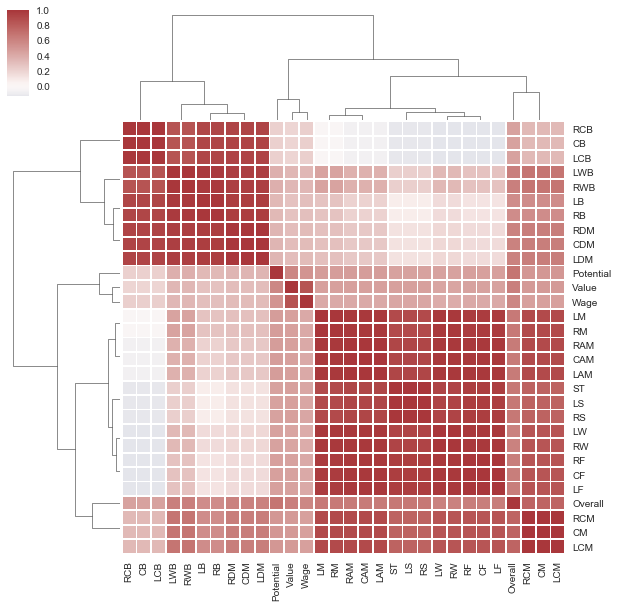

In [28]:
#Heatmap
# Select a subset of the df
used_variables = ['Overall', 'Potential', 'Value', 'Wage', 'CAM',
                  'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM',
                  'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB','RAM', 'RB',
                  'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST']
used_columns = (processed_df.columns.get_level_values(None).isin(used_variables))
df = processed_df.loc[:, used_columns]

# Draw the full plot
plt.figure(figsize=(13,13))
sns.clustermap(df.corr(), center=0, cmap="vlag", linewidths=.75)

# Model

## Value

In [29]:
preprocessed_df = processed_df.copy()
preprocessed_df = preprocessed_df.drop(['Name', 'id', 'Nationality', 'Club'], 1)

In [30]:
#Separate x and y
y_value = preprocessed_df['Value'].copy()
y_wage = preprocessed_df['Wage'].copy()
preprocessed_df = preprocessed_df.drop(['Value', 'Wage'], 1)

In [31]:
#Manually one hot encode Preferred Positions
#Take all the possible positions
all_pos = set(sum([x.strip().split(" ") for x in list(set(preprocessed_df['Preferred Positions']))], []))

preferred_position = preprocessed_df['Preferred Positions']
#For each possible position
for p in all_pos:
    #Create a new series indicating whether the player plays that position
    s = pd.Series()
    #Go through the Preferred Position column
    for player in preferred_position:
        #Mark the column as 1 if the player can play the position and 0 else
        preferred_position_list = re.sub("[^\w]", " ",  player).split() #Split the preferred positions
        if(p in preferred_position_list):
            s1 = pd.Series([1])
            s = s.append(s1, ignore_index=True)
        else:
            s1 = pd.Series([0])
            s = s.append(s1, ignore_index=True)
    preprocessed_df["preferred_" + p] = s

preprocessed_df = preprocessed_df.drop(['Preferred Positions'], 1)

In [32]:
#Train-Test split
X_train_value, X_test_value, y_train_value, y_test_value = train_test_split(preprocessed_df, y_value, test_size=0.2)
X_train_wage, X_test_wage, y_train_wage, y_test_wage = train_test_split(preprocessed_df, y_wage, test_size=0.2)

In [34]:
#Create permutations of different hyperparameter combinations
num_boost_round = 999
early_stopping_rounds = 10

xgb_params = {
                'n_estimators':[500],
                # Other parameters
                'objective':['reg:linear'],
                'eval_metric':[ ["rmse" ,"mae"]],
                'min_child_weight': [1],
                'eta': [0.01, 0.1], #Learning rate
                'gamma': [0.05, 0.1], #Minimum acceptable entropy improvement to perform a split
                #Bias\variance tradeoff knobs
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0],
                'max_depth': [3, 6]
              }

params_perms = [dict(zip(xgb_params, v)) for v in product(*xgb_params.values())]
print(len(params_perms))
print(params_perms[0])

32
{'n_estimators': 500, 'objective': 'reg:linear', 'eval_metric': ['rmse', 'mae'], 'min_child_weight': 1, 'eta': 0.01, 'gamma': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'max_depth': 3}


In [35]:
dtrain_value = xgb.DMatrix(X_train_value, label=y_train_value)
dtest_value = xgb.DMatrix(X_test_value, label=y_test_value)

In [36]:
evaluation_set_value = [(dtest_value, "Test_set")]

### Create Baseline Model for Comparison (Average)

In [132]:
mean_train_value = np.mean(y_train_value)

# Get predictions on the test set
baseline_predictions_value = np.ones(y_test_value.shape) * mean_train_value

# Compute MAE
mae_baseline_value = mean_absolute_error(y_test_value, baseline_predictions_value)

# Compute RMSE
rmse_baseline_value = sqrt(mean_squared_error(y_test_value, baseline_predictions_value))

print("Baseline MAE is {:.2f}".format(mae_baseline_value))
print("Baseline RMSE is {:.2f}".format(rmse_baseline_value))

Baseline MAE is 2718753.98
Baseline RMSE is 5182423.45


In [138]:
average_guess_error_value = np.abs(processed_df['Value'] - processed_df['Value'].mean()).mean()
print("Avergage guess error: ", average_guess_error_value)

Avergage guess error:  2702954.576802654


### Grid Search for Best Parameters

In [39]:
best_score_value = mae_baseline_value
best_params_value = {}
for i, grid_search_value in enumerate(params_perms):
    print("Permutation number:", i+1)
    cv_results_value = xgb.cv(grid_search_value,
                        dtrain_value,
                        num_boost_round=num_boost_round,
                        seed=42,
                        nfold=2,
                        metrics={'mae'},
                        early_stopping_rounds=early_stopping_rounds
                        )
    
    mean_mae_value = cv_results_value['test-mae-mean'].min()
    boost_rounds_value = cv_results_value['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae_value, boost_rounds_value))
    if mean_mae_value < best_score_value:
        best_score_value = mean_mae_value
        best_params_value = grid_search_value

Permutation number: 1


/Users/paulfournier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



	MAE 240901.953125 for 996 rounds
Permutation number: 2
	MAE 174656.5625 for 998 rounds
Permutation number: 3
	MAE 238788.5625 for 998 rounds
Permutation number: 4
	MAE 164563.7734375 for 997 rounds
Permutation number: 5
	MAE 248111.78125 for 998 rounds
Permutation number: 6
	MAE 182457.1875 for 998 rounds
Permutation number: 7
	MAE 245850.328125 for 998 rounds
Permutation number: 8
	MAE 170629.1875 for 998 rounds
Permutation number: 9
	MAE 240901.953125 for 996 rounds
Permutation number: 10
	MAE 174656.5625 for 998 rounds
Permutation number: 11
	MAE 238788.5625 for 998 rounds
Permutation number: 12
	MAE 164563.7734375 for 997 rounds
Permutation number: 13
	MAE 248111.78125 for 998 rounds
Permutation number: 14
	MAE 182457.1875 for 998 rounds
Permutation number: 15
	MAE 245850.328125 for 998 rounds
Permutation number: 16
	MAE 170629.1875 for 998 rounds
Permutation number: 17
	MAE 210309.578125 for 442 rounds
Permutation number: 18
	MAE 187789.9375 for 163 rounds
Permutation number: 19


In [40]:
print("Best Score:", best_score_value)
print("Best Parameters:", best_params_value)

Best Score: 164563.7734375
Best Parameters: {'n_estimators': 500, 'objective': 'reg:linear', 'eval_metric': ['rmse', 'mae'], 'min_child_weight': 1, 'eta': 0.01, 'gamma': 0.05, 'subsample': 0.8, 'colsample_bytree': 1.0, 'max_depth': 6}


### Retrain the Model with the Best Parameters

In [41]:
#Retrain a model with new best params
model_value = xgb.train(
    best_params_value,
    dtrain_value,
    num_boost_round=num_boost_round,
    evals=evaluation_set_value,
    early_stopping_rounds=early_stopping_rounds
)

[0]	Test_set-rmse:5.66339e+06	Test_set-mae:2.39051e+06
Multiple eval metrics have been passed: 'Test_set-mae' will be used for early stopping.

Will train until Test_set-mae hasn't improved in 10 rounds.
[1]	Test_set-rmse:5.61041e+06	Test_set-mae:2.36752e+06
[2]	Test_set-rmse:5.55976e+06	Test_set-mae:2.34489e+06
[3]	Test_set-rmse:5.50725e+06	Test_set-mae:2.32226e+06
[4]	Test_set-rmse:5.45794e+06	Test_set-mae:2.3003e+06
[5]	Test_set-rmse:5.40718e+06	Test_set-mae:2.27822e+06
[6]	Test_set-rmse:5.3571e+06	Test_set-mae:2.25611e+06
[7]	Test_set-rmse:5.30964e+06	Test_set-mae:2.23471e+06
[8]	Test_set-rmse:5.2607e+06	Test_set-mae:2.21333e+06
[9]	Test_set-rmse:5.21075e+06	Test_set-mae:2.19191e+06
[10]	Test_set-rmse:5.16072e+06	Test_set-mae:2.17068e+06
[11]	Test_set-rmse:5.11061e+06	Test_set-mae:2.14966e+06
[12]	Test_set-rmse:5.06177e+06	Test_set-mae:2.129e+06
[13]	Test_set-rmse:5.01392e+06	Test_set-mae:2.1084e+06
[14]	Test_set-rmse:4.96733e+06	Test_set-mae:2.08829e+06
[15]	Test_set-rmse:4.9225e+

[149]	Test_set-rmse:1.51969e+06	Test_set-mae:604467
[150]	Test_set-rmse:1.50797e+06	Test_set-mae:599402
[151]	Test_set-rmse:1.49484e+06	Test_set-mae:594173
[152]	Test_set-rmse:1.48282e+06	Test_set-mae:589110
[153]	Test_set-rmse:1.47171e+06	Test_set-mae:584236
[154]	Test_set-rmse:1.4607e+06	Test_set-mae:579381
[155]	Test_set-rmse:1.44914e+06	Test_set-mae:574423
[156]	Test_set-rmse:1.43692e+06	Test_set-mae:569493
[157]	Test_set-rmse:1.42583e+06	Test_set-mae:564693
[158]	Test_set-rmse:1.41485e+06	Test_set-mae:559793
[159]	Test_set-rmse:1.40467e+06	Test_set-mae:555073
[160]	Test_set-rmse:1.39343e+06	Test_set-mae:550357
[161]	Test_set-rmse:1.38279e+06	Test_set-mae:545787
[162]	Test_set-rmse:1.37256e+06	Test_set-mae:541210
[163]	Test_set-rmse:1.36231e+06	Test_set-mae:536581
[164]	Test_set-rmse:1.35169e+06	Test_set-mae:532070
[165]	Test_set-rmse:1.3414e+06	Test_set-mae:527584
[166]	Test_set-rmse:1.33153e+06	Test_set-mae:523164
[167]	Test_set-rmse:1.32189e+06	Test_set-mae:518795
[168]	Test_set

[318]	Test_set-rmse:628388	Test_set-mae:202394
[319]	Test_set-rmse:627073	Test_set-mae:201613
[320]	Test_set-rmse:625418	Test_set-mae:200848
[321]	Test_set-rmse:623956	Test_set-mae:200051
[322]	Test_set-rmse:622682	Test_set-mae:199404
[323]	Test_set-rmse:621457	Test_set-mae:198734
[324]	Test_set-rmse:620081	Test_set-mae:197993
[325]	Test_set-rmse:618930	Test_set-mae:197282
[326]	Test_set-rmse:617578	Test_set-mae:196522
[327]	Test_set-rmse:616446	Test_set-mae:195846
[328]	Test_set-rmse:614942	Test_set-mae:195075
[329]	Test_set-rmse:613993	Test_set-mae:194389
[330]	Test_set-rmse:612889	Test_set-mae:193834
[331]	Test_set-rmse:611645	Test_set-mae:193101
[332]	Test_set-rmse:610562	Test_set-mae:192403
[333]	Test_set-rmse:609508	Test_set-mae:191772
[334]	Test_set-rmse:608245	Test_set-mae:191127
[335]	Test_set-rmse:607076	Test_set-mae:190529
[336]	Test_set-rmse:606009	Test_set-mae:189933
[337]	Test_set-rmse:605226	Test_set-mae:189284
[338]	Test_set-rmse:604530	Test_set-mae:188741
[339]	Test_se

[493]	Test_set-rmse:539082	Test_set-mae:152815
[494]	Test_set-rmse:538894	Test_set-mae:152732
[495]	Test_set-rmse:538685	Test_set-mae:152680
[496]	Test_set-rmse:538482	Test_set-mae:152561
[497]	Test_set-rmse:538342	Test_set-mae:152516
[498]	Test_set-rmse:538222	Test_set-mae:152470
[499]	Test_set-rmse:538053	Test_set-mae:152356
[500]	Test_set-rmse:537939	Test_set-mae:152276
[501]	Test_set-rmse:537830	Test_set-mae:152234
[502]	Test_set-rmse:537760	Test_set-mae:152176
[503]	Test_set-rmse:537627	Test_set-mae:152133
[504]	Test_set-rmse:537543	Test_set-mae:152120
[505]	Test_set-rmse:537406	Test_set-mae:152069
[506]	Test_set-rmse:537388	Test_set-mae:152005
[507]	Test_set-rmse:537354	Test_set-mae:151982
[508]	Test_set-rmse:537207	Test_set-mae:151922
[509]	Test_set-rmse:536976	Test_set-mae:151865
[510]	Test_set-rmse:536800	Test_set-mae:151793
[511]	Test_set-rmse:536666	Test_set-mae:151751
[512]	Test_set-rmse:536669	Test_set-mae:151703
[513]	Test_set-rmse:536504	Test_set-mae:151665
[514]	Test_se

[668]	Test_set-rmse:530654	Test_set-mae:147500
[669]	Test_set-rmse:530647	Test_set-mae:147478
[670]	Test_set-rmse:530662	Test_set-mae:147477
[671]	Test_set-rmse:530685	Test_set-mae:147453
[672]	Test_set-rmse:530706	Test_set-mae:147452
[673]	Test_set-rmse:530663	Test_set-mae:147427
[674]	Test_set-rmse:530697	Test_set-mae:147405
[675]	Test_set-rmse:530601	Test_set-mae:147383
[676]	Test_set-rmse:530599	Test_set-mae:147389
[677]	Test_set-rmse:530537	Test_set-mae:147376
[678]	Test_set-rmse:530615	Test_set-mae:147366
[679]	Test_set-rmse:530531	Test_set-mae:147346
[680]	Test_set-rmse:530460	Test_set-mae:147302
[681]	Test_set-rmse:530422	Test_set-mae:147308
[682]	Test_set-rmse:530403	Test_set-mae:147289
[683]	Test_set-rmse:530356	Test_set-mae:147231
[684]	Test_set-rmse:530396	Test_set-mae:147234
[685]	Test_set-rmse:530375	Test_set-mae:147222
[686]	Test_set-rmse:530337	Test_set-mae:147196
[687]	Test_set-rmse:530373	Test_set-mae:147188
[688]	Test_set-rmse:530367	Test_set-mae:147173
[689]	Test_se

[843]	Test_set-rmse:529033	Test_set-mae:144828
[844]	Test_set-rmse:529024	Test_set-mae:144829
[845]	Test_set-rmse:529015	Test_set-mae:144830
[846]	Test_set-rmse:529036	Test_set-mae:144827
[847]	Test_set-rmse:528892	Test_set-mae:144813
[848]	Test_set-rmse:528891	Test_set-mae:144805
[849]	Test_set-rmse:528876	Test_set-mae:144790
[850]	Test_set-rmse:528873	Test_set-mae:144789
[851]	Test_set-rmse:528808	Test_set-mae:144757
[852]	Test_set-rmse:528939	Test_set-mae:144763
[853]	Test_set-rmse:528939	Test_set-mae:144765
[854]	Test_set-rmse:528893	Test_set-mae:144752
[855]	Test_set-rmse:528878	Test_set-mae:144744
[856]	Test_set-rmse:528899	Test_set-mae:144742
[857]	Test_set-rmse:528894	Test_set-mae:144742
[858]	Test_set-rmse:528884	Test_set-mae:144720
[859]	Test_set-rmse:528859	Test_set-mae:144706
[860]	Test_set-rmse:528879	Test_set-mae:144717
[861]	Test_set-rmse:528937	Test_set-mae:144734
[862]	Test_set-rmse:528930	Test_set-mae:144735
[863]	Test_set-rmse:528916	Test_set-mae:144724
[864]	Test_se

### Evaluate the Model

In [140]:
print("Average guess error", average_guess_error_value)
print("vs Mean Absolute Error", mean_absolute_error(model_value.predict(dtest_value), y_test_value))

Average guess error 2702954.576802654
vs Mean Absolute Error 144536.9109458213


### Model Summary

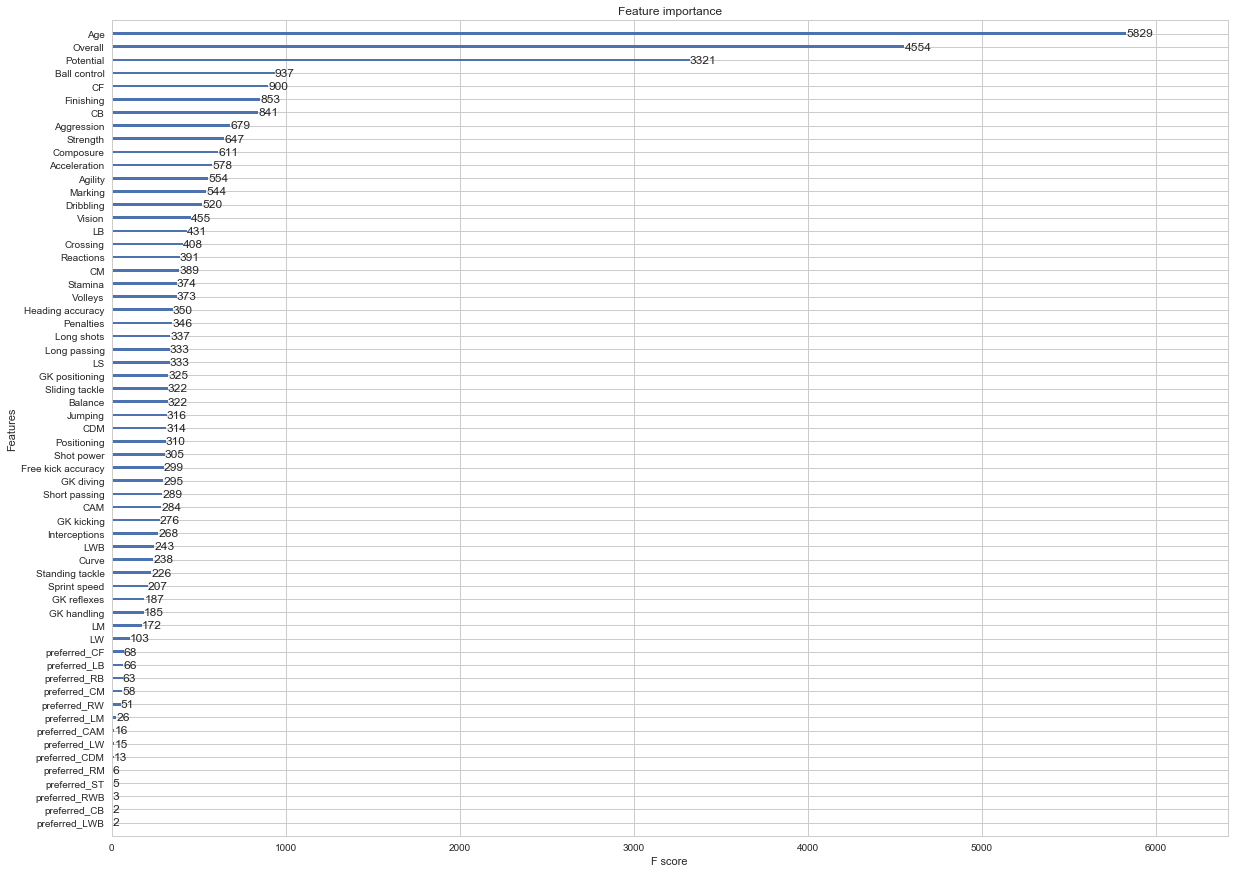

In [43]:
#Feature Importance
plt.figure(figsize=(20,15))
xgb.plot_importance(model_value, ax=plt.gca())

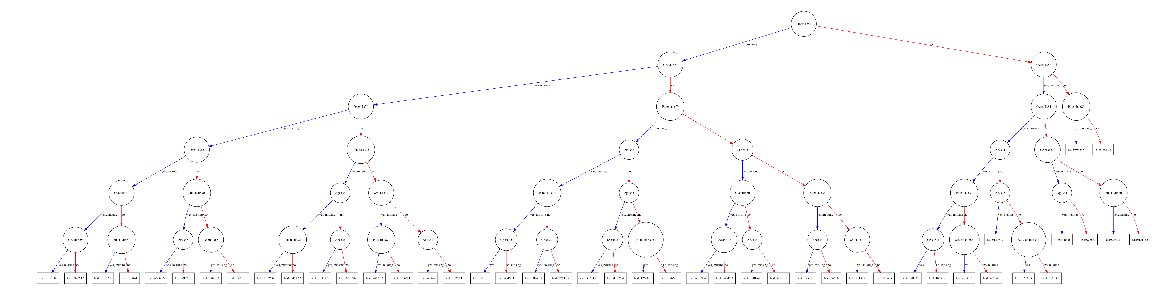

In [121]:
#Tree Diagram
plt.figure(figsize=(20,15))
xgb.plot_tree(model_value, ax=plt.gca())

### Predictions

In [47]:
#Predict the value based on the model.
dpred_value = xgb.DMatrix(preprocessed_df, label = y_value)
y_pred = pd.Series(model_value.predict(dpred_value))

In [118]:
#Top 10% players with overpriced transfer values.
sub_value = y_value.subtract(y_pred)
exp_value = processed_df.loc[sub.nlargest(int(len(sub_value/1000))]
exp_value

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
34,34,M. Verratti,24,Italy,87,91,Paris Saint-Germain,64500000.0,130000.0,69.0,...,79.0,77.0,85.0,84.0,77.0,80.0,69.0,78.0,80.0,69.0
183,183,M. Dembélé,29,Belgium,83,83,Tottenham Hotspur,25000000.0,115000.0,75.0,...,76.0,78.0,81.0,80.0,79.0,79.0,77.0,78.0,77.0,77.0
344,344,J. Corona,24,Mexico,81,85,FC Porto,23000000.0,17000.0,87.0,...,59.0,49.0,74.0,58.0,80.0,80.0,75.0,81.0,63.0,75.0
36,36,C. Eriksen,25,Denmark,87,91,Tottenham Hotspur,65000000.0,165000.0,77.0,...,64.0,53.0,83.0,68.0,82.0,84.0,77.0,83.0,69.0,77.0
108,108,K. Strootman,27,Netherlands,84,85,Roma,35000000.0,105000.0,65.0,...,78.0,79.0,83.0,83.0,78.0,78.0,76.0,77.0,79.0,76.0
111,111,Bruno,33,Spain,84,84,Villarreal CF,18500000.0,59000.0,42.0,...,74.0,78.0,82.0,82.0,74.0,72.0,71.0,71.0,75.0,71.0
181,181,A. Valencia,31,Ecuador,83,83,Manchester United,17000000.0,130000.0,88.0,...,82.0,79.0,77.0,80.0,77.0,80.0,75.0,78.0,82.0,75.0
543,543,S. Boufal,23,Morocco,79,84,Southampton,17000000.0,90000.0,83.0,...,55.0,42.0,71.0,54.0,77.0,78.0,70.0,79.0,59.0,70.0
58,58,Diego Costa,28,Spain,86,86,Chelsea,46000000.0,235000.0,74.0,...,58.0,57.0,71.0,60.0,80.0,76.0,83.0,77.0,60.0,83.0
470,470,M. Díaz,30,Chile,80,80,U.N.A.M.,13500000.0,31000.0,65.0,...,75.0,74.0,79.0,79.0,72.0,73.0,69.0,72.0,76.0,69.0


In [119]:
#Top 10% players with underpriced transfer values.
cheap_value = sub_value.nsmallest(int(len(sub_value)/1000))
cheap_value = processed_df.loc[cheap_value.index]
cheap_value

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
658,658,Gervinho,30,Ivory Coast,79,79,NaN,0.0,0.0,91.0,...,55.0,43.0,71.0,54.0,77.0,79.0,74.0,78.0,59.0,74.0
10,10,Sergio Ramos,31,Spain,90,90,Real Madrid CF,52000000.0,310000.0,75.0,...,84.0,87.0,74.0,83.0,70.0,71.0,72.0,69.0,81.0,72.0
2973,2973,W. Faríñez,19,Venezuela,73,87,NaN,0.0,0.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,1802,D. González,23,Paraguay,75,82,NaN,0.0,0.0,85.0,...,57.0,51.0,69.0,57.0,73.0,74.0,71.0,74.0,60.0,71.0
91,91,A. Barzagli,36,Italy,85,85,Juventus,5000000.0,105000.0,64.0,...,75.0,83.0,63.0,76.0,55.0,57.0,53.0,55.0,71.0,53.0
1819,1819,M. Martins,30,Bolivia,75,75,NaN,0.0,0.0,64.0,...,47.0,46.0,63.0,50.0,71.0,68.0,74.0,69.0,50.0,74.0
944,944,B. Dočkal,28,Czech Republic,77,77,NaN,0.0,0.0,68.0,...,61.0,55.0,74.0,63.0,75.0,75.0,71.0,75.0,64.0,71.0
1019,1019,Gil,30,Brazil,77,77,NaN,0.0,0.0,53.0,...,70.0,76.0,65.0,74.0,57.0,58.0,57.0,55.0,68.0,57.0
2626,2626,J. Zmrhal,23,Czech Republic,73,78,NaN,0.0,0.0,80.0,...,63.0,57.0,69.0,62.0,71.0,72.0,70.0,71.0,65.0,70.0
925,925,B. Moukandjo,28,Cameroon,77,77,NaN,0.0,0.0,90.0,...,53.0,44.0,66.0,51.0,76.0,76.0,76.0,77.0,56.0,76.0


In [54]:
pkl_filename = "pickle_model_value.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(model_value, file)

In [144]:
model.save_model("asdfghj.model")

## Wage

In [126]:
dtrain_wage = xgb.DMatrix(X_train_wage, label=y_train_wage)
dtest_wage = xgb.DMatrix(X_test_wage, label=y_test_wage)
evaluation_set_wage = [(dtest_wage, "Test_set")]

### Create Baseline Model for Comparison (Average)

In [133]:
mean_train_wage = np.mean(y_train_wage)

# Get predictions on the test set
baseline_predictions_wage = np.ones(y_test_wage.shape) * mean_train_wage

# Compute MAE
mae_baseline_wage = mean_absolute_error(y_test_wage, baseline_predictions_wage)

# Compute RMSE
rmse_baseline_wage = sqrt(mean_squared_error(y_test_wage, baseline_predictions_wage))

print("Baseline MAE is {:.2f}".format(mae_baseline_wage))
print("Baseline RMSE is {:.2f}".format(rmse_baseline_wage))

Baseline MAE is 12187.12
Baseline RMSE is 22399.96


In [137]:
average_guess_error_wage = np.abs(processed_df['Wage'] - processed_df['Wage'].mean()).mean()
print("Avergage guess error: {}".format(average_guess_error_wage))

Avergage guess error: 12006.856801158267


### Grid Search for Best Parameters

In [ ]:
best_score_wage = mae_baseline_wage
best_params_wage = {}
for i, grid_search_wage in enumerate(params_perms):
    print("Permutation number:", i+1)
    cv_results_wage = xgb.cv(grid_search_wage,
                        dtrain_wage,
                        num_boost_round=num_boost_round,
                        seed=42,
                        nfold=2,
                        metrics={'mae'},
                        early_stopping_rounds=early_stopping_rounds
                        )
    
    mean_mae_wage = cv_results_wage['test-mae-mean'].min()
    boost_rounds_wage = cv_results_wage['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae_wage, boost_rounds_wage))
    if mean_mae_wage < best_score_wage:
        best_score_wage = mean_mae_wage
        best_params_wage = grid_search_wage

In [ ]:
print("Best Score:", best_score_wage)
print("Best Parameters:", best_params_wage)

### Retrain the Model with the Best Parameters

In [ ]:
#Retrain a model with new best params
model_wage = xgb.train(
    best_params_wage,
    dtrain_wage,
    num_boost_round=num_boost_round,
    evals=evaluation_set_wage,
    early_stopping_rounds=early_stopping_rounds
)

### Evaluate the Model

In [ ]:
print("Average guess error", average_guess_error_wage)
print("vs Mean Absolute Error", mean_absolute_error(model_wage.predict(dtest_wage), y_test_value_wage))

### Model Summary

In [ ]:
#Feature Importance
plt.figure(figsize=(20,15))
xgb.plot_importance(model_wage, ax=plt.gca())

In [ ]:
#Tree Diagram
plt.figure(figsize=(20,15))
xgb.plot_tree(model_wage, ax=plt.gca())

### Predictions

In [ ]:
#Predict the value based on the model.
dpred_wage = xgb.DMatrix(preprocessed_df, label = y_wage)
y_pred_wage = pd.Series(model_wage.predict(dpred_wage))

In [ ]:
#Top 10% players with overpriced wages.
sub_wage = y_value.subtract(y_pred_wage)
exp_wage = processed_df.loc[sub.nlargest(int(len(sub_wage)/1000))]
exp_wage

In [ ]:
#Top 10% players with underpriced transfer values.
cheap_wage = sub_wage.nsmallest(int(len(sub_wage)/1000))
cheap_wage = processed_df.loc[cheap_wage.index]
cheap_wage

In [ ]:
pkl_filename = "pickle_model_wage.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(model_wage, file)